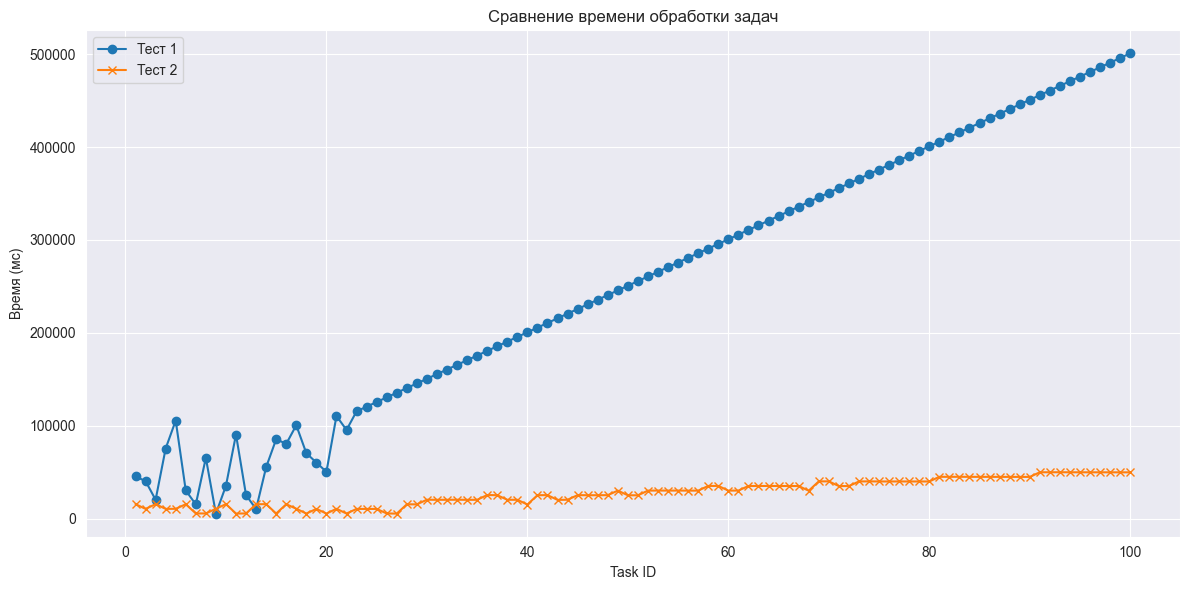

In [3]:
import re
import matplotlib.pyplot as plt

# ---------- Первый лог-файл ----------
log_file_path_1 = "../logs/consumer/consumer_1.log"
pattern = re.compile(r'Task (\d+) processed in (\d+) ms')

task_ids_1 = []
durations_1 = []

with open(log_file_path_1, 'r') as file:
    for line in file:
        match = pattern.search(line)
        if match:
            task_ids_1.append(int(match.group(1)))
            durations_1.append(int(match.group(2)))

sorted_data_1 = sorted(zip(task_ids_1, durations_1), key=lambda x: x[0])
task_ids_1, durations_1 = zip(*sorted_data_1)


# ---------- Второй лог-файл ----------
log_file_path_2 = "../logs/consumer/consumer_2.log"

task_ids_2 = []
durations_2 = []

with open(log_file_path_2, 'r') as file:
    for line in file:
        match = pattern.search(line)
        if match:
            task_ids_2.append(int(match.group(1)))
            durations_2.append(int(match.group(2)))

sorted_data_2 = sorted(zip(task_ids_2, durations_2), key=lambda x: x[0])
task_ids_2, durations_2 = zip(*sorted_data_2)


# ---------- Построение графика ----------
plt.figure(figsize=(12, 6))
plt.plot(task_ids_1, durations_1, marker='o', label='Тест 1')
plt.plot(task_ids_2, durations_2, marker='x', label='Тест 2')

plt.title("Сравнение времени обработки задач")
plt.xlabel("Task ID")
plt.ylabel("Время (мс)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

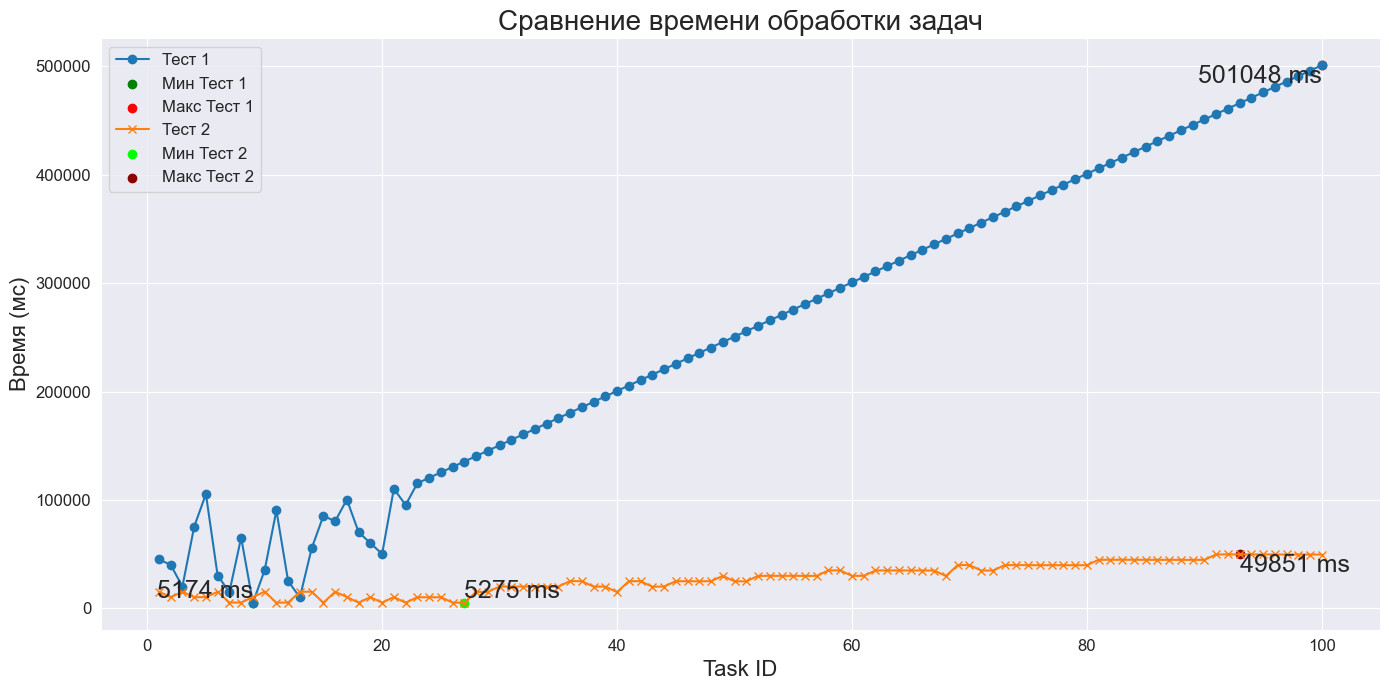

In [7]:
import re
import matplotlib.pyplot as plt

def parse_log(log_file_path):
    pattern = re.compile(r'Task (\d+) processed in (\d+) ms')
    task_ids = []
    durations = []

    with open(log_file_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                task_ids.append(int(match.group(1)))
                durations.append(int(match.group(2)))

    sorted_data = sorted(zip(task_ids, durations), key=lambda x: x[0])
    return zip(*sorted_data)

# Парсим логи
task_ids_1, durations_1 = parse_log("../logs/consumer/consumer_1.log")
task_ids_2, durations_2 = parse_log("../logs/consumer/consumer_2.log")

# Создаём график
plt.figure(figsize=(14, 7))

# Первый график
plt.plot(task_ids_1, durations_1, marker='o', label='Тест 1')
min_idx_1 = durations_1.index(min(durations_1))
max_idx_1 = durations_1.index(max(durations_1))
plt.scatter(task_ids_1[min_idx_1], durations_1[min_idx_1], color='green', label='Мин Тест 1')
plt.scatter(task_ids_1[max_idx_1], durations_1[max_idx_1], color='red', label='Макс Тест 1')
plt.text(task_ids_1[min_idx_1], durations_1[min_idx_1], f'{durations_1[min_idx_1]} ms', fontsize=18, va='bottom', ha='right')
plt.text(task_ids_1[max_idx_1], durations_1[max_idx_1], f'{durations_1[max_idx_1]} ms', fontsize=18, va='top', ha='right')

# Второй график
plt.plot(task_ids_2, durations_2, marker='x', label='Тест 2')
min_idx_2 = durations_2.index(min(durations_2))
max_idx_2 = durations_2.index(max(durations_2))
plt.scatter(task_ids_2[min_idx_2], durations_2[min_idx_2], color='lime', label='Мин Тест 2')
plt.scatter(task_ids_2[max_idx_2], durations_2[max_idx_2], color='darkred', label='Макс Тест 2')
plt.text(task_ids_2[min_idx_2], durations_2[min_idx_2], f'{durations_2[min_idx_2]} ms', fontsize=18, va='bottom', ha='left')
plt.text(task_ids_2[max_idx_2], durations_2[max_idx_2], f'{durations_2[max_idx_2]} ms', fontsize=18, va='top', ha='left')

# Оформление
plt.title("Сравнение времени обработки задач", fontsize=20)
plt.xlabel("Task ID", fontsize=16)
plt.ylabel("Время (мс)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()